# SENTIMENT ANALYSIS

# Package preparation

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [51]:
#mpl.rcParams['figure.figsize']=(8.0,6.0)   #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

# Read data in sql

In [52]:
import pymysql,re

host = "127.0.0.1"
port = "3306"
user = "root"
password = ""
database = "digital_talent"

conn = pymysql.connect(
    host=host,
    port=int(port),
    user=user,
    passwd=password,
    db=database,
    charset='utf8mb4')

In [53]:
def run(sql):
    df = pd.read_sql_query(sql,conn)
    return df

news = run("SELECT * FROM event_election_new WHERE title != 'not found'")

news.head()

,waktu,url,tone,title,content,Sentiment
0,2018-08-10,http://en.qantara.de/content/indonesias-joko-w...,0.000000,indonesia's joko widodo names muslim cleric as...,indonesia's joko widodo names muslim cleric as...,Neutral
1,2018-06-06,http://en.republika.co.id/berita/en/national-p...,2.721088,it hurts to see elections split the community:...,jokowi says indonesia is respected abroad for ...,Positive
2,2018-08-18,http://jakartaglobe.id/human-rights-news/democ...,-5.913979,democratic maturity will ensure peaceful elect...,the president also highlighted the role of sta...,Negative
3,2018-08-16,http://jakartaglobe.id/news/democratic-maturit...,-5.913979,democratic maturity will ensure peaceful elect...,the president also highlighted the role of sta...,Negative
4,2018-08-09,http://jakartaglobe.id/news/islamic-scholar-ma...,2.647059,islamic scholar ma'ruf amin becomes jokowi's r...,president joko 'jokowi' widodo has chosen ma'r...,Positive


# WordCloud before pre-processing

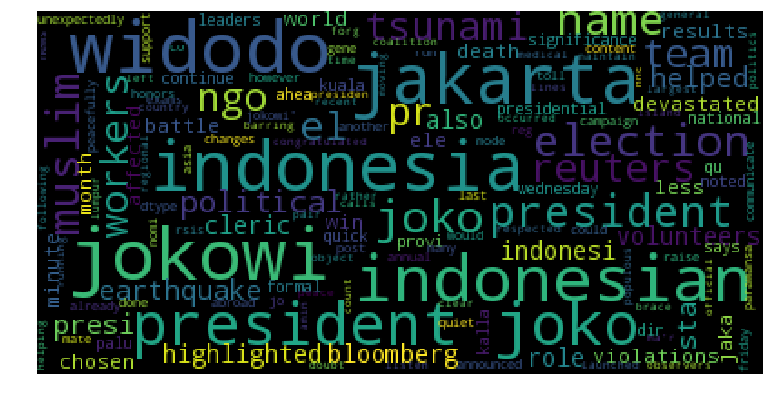

In [73]:
# All word
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords.words('english'),
                          max_words=1000,
                          max_font_size=40, 
                          random_state=42,
                         ).generate(str(news.content))

print(wordcloud)

fig = plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word-all.png", dpi=900)

In [56]:
# Splitting the dataset into train and test set
train, test = train_test_split(news,test_size = 0.1)

train_pos = train[train['Sentiment'] == 'Positive']
train_pos = train_pos['content']
train_neg = train[train['Sentiment'] == 'Negative']
train_neg = train_neg['content']

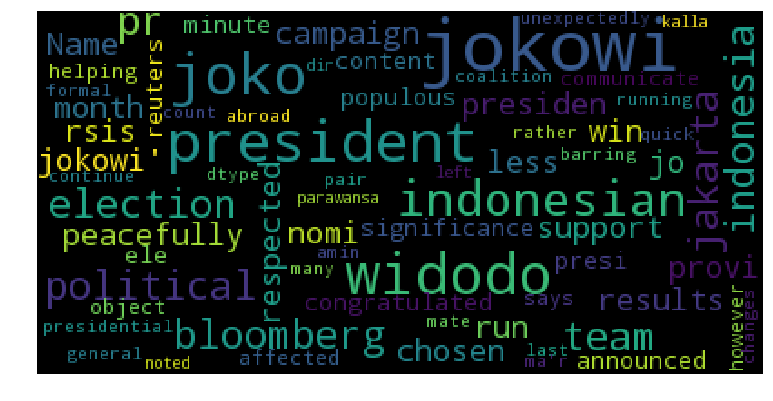

In [74]:
# positive word
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords.words('english'),
                          max_words=1000,
                          max_font_size=40, 
                          random_state=42,
                         ).generate(str(train_pos))

print(wordcloud)

fig = plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word-pos.png", dpi=900)

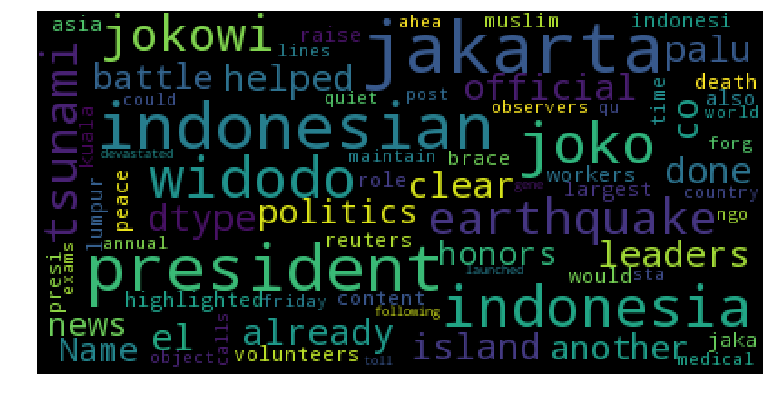

In [58]:
# negative word
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords.words('english'),
                          max_words=1000,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(train_neg))

print(wordcloud)

fig = plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word-neg.png", dpi=900)

# Pre-processing and get word features

In [66]:
sw = stopwords.words('english')

def preprocess(data):
    tokens = []
    for words in data:
        words = words.lower() #Convert to lower-case words
        raw_word_tokens = re.findall(r'(?:\w+)', words,flags = re.UNICODE) #remove pontuaction
        word_tokens = [w for w in raw_word_tokens if not w in sw] # do not add stop words
        tokens.append(word_tokens)
    return tokens #return all tokens

In [68]:
word_features = preprocess(news.content)

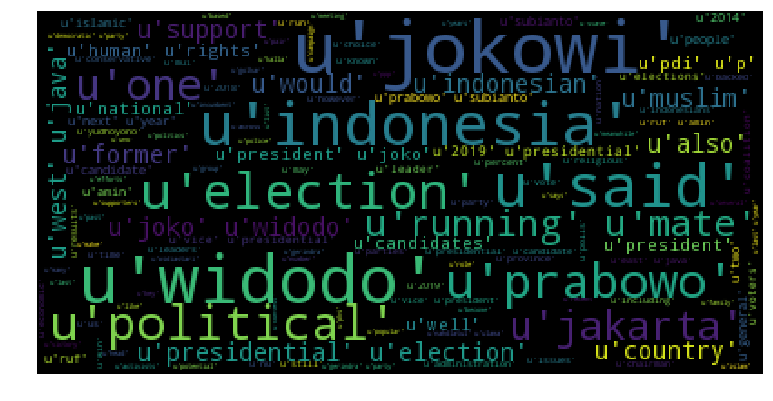

In [69]:
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=sw,
                          max_words=1000,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(word_features))

print(wordcloud)

fig = plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word-features.png", dpi=900)

In [70]:
# def remove_punctuation(s):
#     import string
#     s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
#     return s

# news['title'] = news['title'].apply(remove_punctuation)
# news['title']

In [72]:
# def stopwords(text):
#     '''a function for removing the stopword'''
#     # removing the stop words and lowercasing the selected words
#     text = [word.lower() for word in text.split() if word.lower() not in sw]
#     # joining the list of words with space separator
#     return " ".join(text)

# news['title'] = news['title'].apply(stopwords)
# news['title']

# Bag of Words

In [75]:
def construct_bag_of_words(data):
    corpus = preprocess(data)
    bag_of_words = {}
    word_count = 0
    for sentence in corpus:
        for word in sentence:
            if word not in bag_of_words: # do not allow repetitions
                bag_of_words[word] = word_count #set indexes
                word_count+=1
            
    #print(dict(Counter(bag_of_words).most_common(5)))
    return bag_of_words #index of letters

bag_of_words = construct_bag_of_words(news.content)

In [76]:
bag_of_words

{u'limited': 3441,
 u'tasikmalaya': 1341,
 u'2019golput': 3303,
 u'interference': 3168,
 u'child': 2450,
 u'tubagus': 1500,
 u'dynasty': 3658,
 u'four': 1060,
 u'credentials': 554,
 u'asian': 1743,
 u'controversial': 458,
 u'railing': 3339,
 u'saved': 1661,
 u'consider': 1701,
 u'relationships': 176,
 u'whose': 1107,
 u'votes': 1346,
 u'prioritized': 2942,
 u'aug': 2603,
 u'eligible': 3781,
 u'shihab': 3434,
 u'deploying': 3121,
 u'activist': 2297,
 u'kalimantan': 1524,
 u'nasdem': 1488,
 u'sway': 2958,
 u'worth': 2873,
 u'partys': 2741,
 u'digit': 1505,
 u'risk': 634,
 u'regional': 120,
 u'bhinneka': 225,
 u'handling': 3143,
 u'every': 117,
 u'uncertain': 3487,
 u'memes': 3798,
 u'vast': 744,
 u'tickets': 2344,
 u'school': 108,
 u'scholar': 921,
 u'skills': 3705,
 u'l\xfa': 2398,
 u'tarnishing': 1226,
 u'companies': 3833,
 u'wednesday': 113,
 u'persisted': 591,
 u'red': 3815,
 u'guiding': 2782,
 u'abolishing': 3231,
 u'unifying': 1829,
 u'stating': 3410,
 u'heading': 2087,
 u'enjoy': 

In [77]:
def featurize(sentence_tokens,bag_of_words):
    sentence_features = [0 for x in range(len(bag_of_words))]
 
    for word in sentence_tokens:
        index = bag_of_words[word]
        sentence_features[index] +=1
    return sentence_features

In [78]:
def get_batch_features(data,bag_of_words):
    batch_features = []
    tokens = preprocess(data)
    for words in tokens:
        feature_words = featurize(words,bag_of_words)
        batch_features.append(feature_words)
    return batch_features
 
batch_features = get_batch_features(news.content,bag_of_words)

In [79]:
batch_features

[[3,
  4,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  3,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


# Classification modelling

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(batch_features, news.Sentiment, test_size=0.1, random_state=42)

In [102]:
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
 
from time import time
from sklearn import metrics
 
 
# clf = Perceptron(max_iter=50)
clf = MultinomialNB(alpha=.01)

print("n_samples: %d, n_features: %d" % X_train.shape)

clf.fit(X_train, y_train)
 
pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

n_samples: 39, n_features: 3390
accuracy:   0.800


# TfIdf Vectorizer

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from time import time
from sklearn import metrics
 
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
 
X_train, X_test, y_train, y_test = train_test_split(news.content, news.Sentiment, test_size=0.1, random_state=42)
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, 
                                 stop_words='english') #apply prepreocessing and stopwords

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#Uncomment to test others classifiers
#clf = Perceptron(n_iter=50)
# clf = BernoulliNB(alpha=.01)
clf = MultinomialNB(alpha=.01)
# clf = RandomForestClassifier()
 
print("n_samples: %d, n_features: %d" % X_train.shape)
 
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

n_samples: 39, n_features: 3390
accuracy:   0.800


In [100]:
# print(X_train)
# print(X_test)
# print(y_train)
print(y_test)
print(pred)

37    Positive
24     Neutral
25    Positive
36    Positive
34    Negative
Name: Sentiment, dtype: object
[u'Positive' u'Neutral' u'Positive' u'Negative' u'Negative']
